In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from google.colab import drive

In [2]:
drive.mount('/content/drive')
data_set="/content/drive/MyDrive/DATASETS CSV_EXCEL/quikr_car.csv"  
df = pd.read_csv(data_set)

Mounted at /content/drive


In [3]:
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000.00,"45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [4]:
df.describe()

,name,company,year,Price,kms_driven,fuel_type
count,892,892,892,892,840,837
unique,525,48,61,274,258,3
top,Honda City,Maruti,2015,Ask For Price,"45,000 kms",Petrol
freq,13,235,117,35,30,440


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


## **Data Cleaning**

In [6]:
df.isna().sum()

name           0
company        0
year           0
Price          0
kms_driven    52
fuel_type     55
dtype: int64

In [7]:
df['Price'].replace(to_replace='Ask For Price',value=np.nan,inplace=True)


In [8]:
df.isna().sum()

name           0
company        0
year           0
Price         35
kms_driven    52
fuel_type     55
dtype: int64

In [9]:
df['Price']=df['Price'].str.replace(',','').astype(float)
df['Price'].mean()
df['Price'].replace(np.nan,df['Price'].mean(),inplace=True)


In [10]:
df.isnull().sum()

name           0
company        0
year           0
Price          0
kms_driven    52
fuel_type     55
dtype: int64

In [11]:
df.describe(include='all')

,name,company,year,Price,kms_driven,fuel_type
count,892,892,892,8.920000e+02,840,837
unique,525,48,61,NaN,258,3
top,Honda City,Maruti,2015,NaN,"45,000 kms",Petrol
freq,13,235,117,NaN,30,440
mean,NaN,NaN,NaN,4.046885e+05,NaN,NaN
std,NaN,NaN,NaN,4.563014e+05,NaN,NaN
min,NaN,NaN,NaN,3.000000e+04,NaN,NaN
25%,NaN,NaN,NaN,1.787500e+05,NaN,NaN
50%,NaN,NaN,NaN,3.100000e+05,NaN,NaN
75%,NaN,NaN,NaN,4.750000e+05,NaN,NaN


In [12]:
df_cl=df
df_cl.isnull().sum()

name           0
company        0
year           0
Price          0
kms_driven    52
fuel_type     55
dtype: int64

In [13]:
df_cl=df_cl[df['year'].str.isnumeric()]

In [14]:
df_cl['kms_driven']=df_cl['kms_driven'].str.split().str.get(0).str.replace(',','')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [15]:
df_cl['name']=df_cl['name'].str.split().str.slice(start=0,stop=3).str.join(' ')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
df_cl[['name','company']]

,name,company
0,Hyundai Santro Xing,Hyundai
1,Mahindra Jeep CL550,Mahindra
2,Maruti Suzuki Alto,Maruti
3,Hyundai Grand i10,Hyundai
4,Ford EcoSport Titanium,Ford
...,...,...
886,Toyota Corolla Altis,Toyota
888,Tata Zest XM,Tata
889,Mahindra Quanto C8,Mahindra
890,Honda Amaze 1.2,Honda


In [17]:
df_cl.dropna(subset=['kms_driven','fuel_type'],inplace=True)
df_cl['kms_driven']=df_cl['kms_driven'].astype(int)
df_cl['year']=df_cl['year'].astype(int)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/index

In [18]:
df_cl.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000.000000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000.000000,40,Diesel
2,Maruti Suzuki Alto,Maruti,2018,404688.534422,22000,Petrol
3,Hyundai Grand i10,Hyundai,2014,325000.000000,28000,Petrol
4,Ford EcoSport Titanium,Ford,2014,575000.000000,36000,Diesel


In [19]:
df_cl.isnull().sum()

name          0
company       0
year          0
Price         0
kms_driven    0
fuel_type     0
dtype: int64

In [20]:
df_cl.dropna(subset=['kms_driven','fuel_type'],inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [21]:
df_cl.isnull().sum()

name          0
company       0
year          0
Price         0
kms_driven    0
fuel_type     0
dtype: int64

In [22]:
df_cl[df_cl['kms_driven'].isnull()]


,name,company,year,Price,kms_driven,fuel_type


In [23]:
df_cl=df_cl.drop_duplicates()

In [24]:
df_cl.dropna(axis=0)

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000.000000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000.000000,40,Diesel
2,Maruti Suzuki Alto,Maruti,2018,404688.534422,22000,Petrol
3,Hyundai Grand i10,Hyundai,2014,325000.000000,28000,Petrol
4,Ford EcoSport Titanium,Ford,2014,575000.000000,36000,Diesel
...,...,...,...,...,...,...
883,Maruti Suzuki Ritz,Maruti,2011,270000.000000,50000,Petrol
885,Tata Indica V2,Tata,2009,110000.000000,30000,Diesel
886,Toyota Corolla Altis,Toyota,2009,300000.000000,132000,Petrol
888,Tata Zest XM,Tata,2018,260000.000000,27000,Diesel


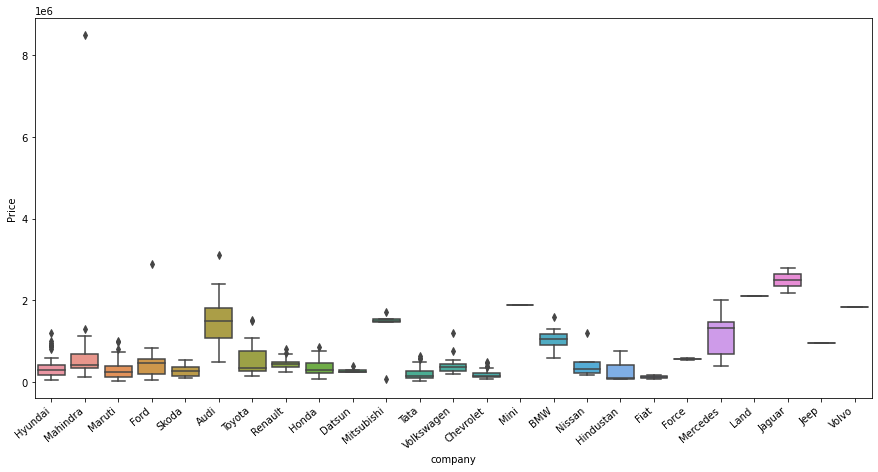

In [25]:
plt.subplots(figsize=(15,7))
ax=sns.boxplot(x='company',y='Price',data=df_cl)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

## **Dealing With Outliers**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


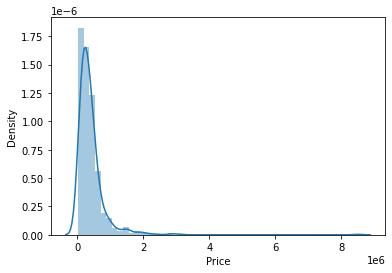

In [26]:
sns.distplot(df_cl['Price'])

In [27]:
quant=df_cl['Price'].quantile(0.99)
cl_df1=df_cl[df_cl['Price']<quant]
cl_df1.describe()

,year,Price,kms_driven
count,733.000000,7.330000e+02,733.000000
mean,2012.376535,3.711757e+05,46751.592087
std,4.167608,3.008518e+05,34895.324825
min,1995.000000,3.000000e+04,0.000000
25%,2010.000000,1.700000e+05,27000.000000
50%,2013.000000,2.999990e+05,42000.000000
75%,2015.000000,4.750000e+05,59000.000000
max,2019.000000,1.900000e+06,400000.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


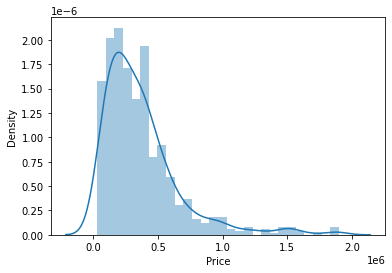

In [28]:
sns.distplot(cl_df1['Price'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


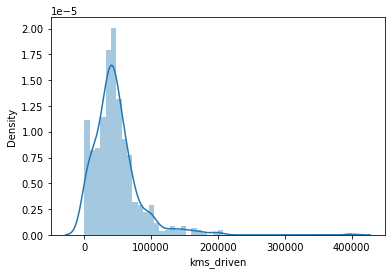

In [29]:
sns.distplot(df_cl['kms_driven'])

In [30]:
quant=cl_df1['kms_driven'].quantile(0.99)
cl_df1=cl_df1[cl_df1['kms_driven']<quant]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


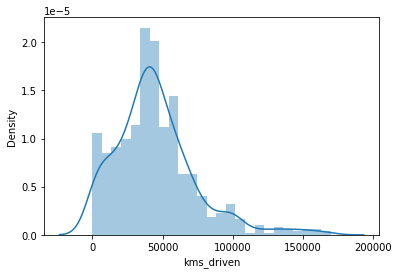

In [31]:
sns.distplot(cl_df1['kms_driven'])

In [32]:
cl_df1.describe()

,year,Price,kms_driven
count,725.000000,7.250000e+02,725.000000
mean,2012.379310,3.716718e+05,44887.016552
std,4.157914,3.010660e+05,29281.048205
min,1995.000000,3.000000e+04,0.000000
25%,2010.000000,1.700000e+05,27000.000000
50%,2013.000000,2.999990e+05,41000.000000
75%,2015.000000,4.750000e+05,58000.000000
max,2019.000000,1.900000e+06,170000.000000


## **Visualizing the Trends**

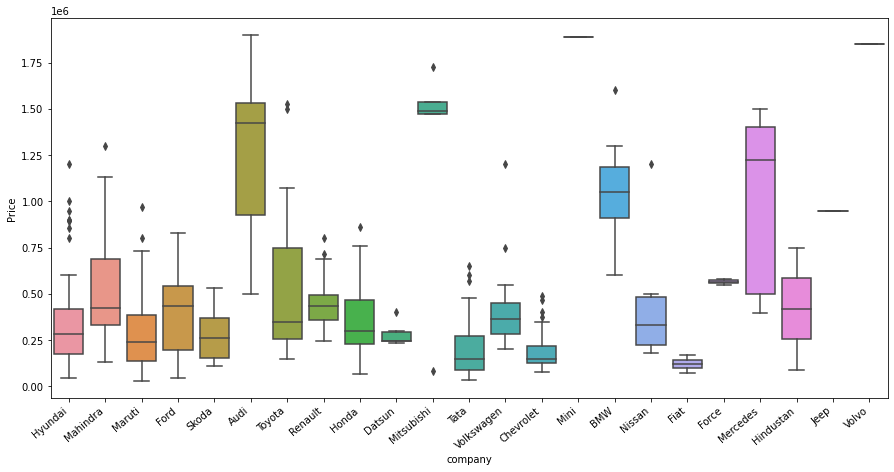

In [33]:
plt.subplots(figsize=(15,7))
ax=sns.boxplot(x='company',y='Price',data=cl_df1)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

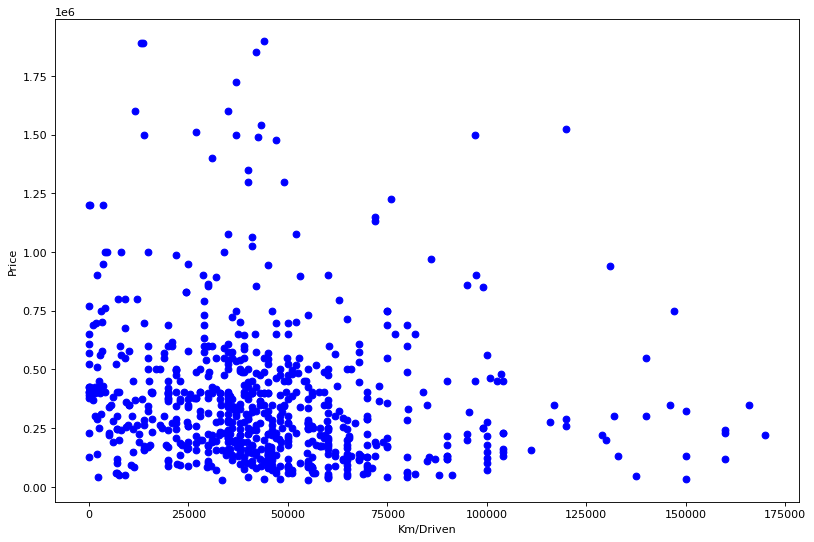

In [34]:
plt.figure(figsize=(12, 8), dpi=80)
plt.scatter(x=cl_df1['kms_driven'], y=cl_df1['Price'],  color='blue')
plt.xlabel("Km/Driven")
plt.ylabel("Price")
plt.show()

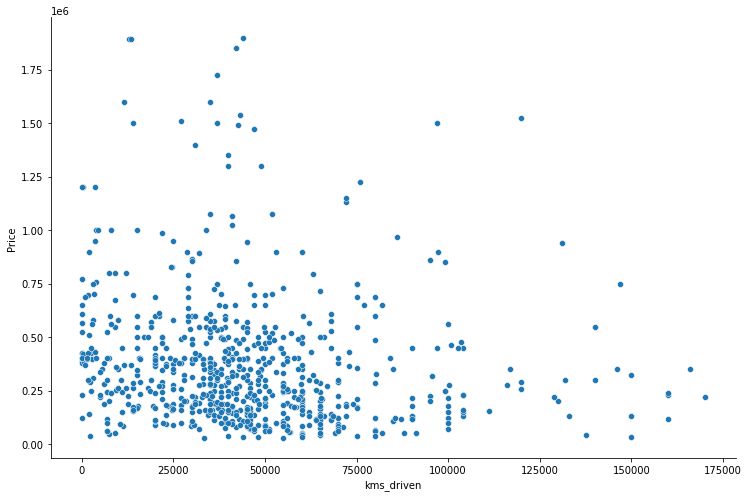

In [35]:
sns.relplot(x='kms_driven',y='Price',data=cl_df1,height=7,aspect=1.5)

## **Using log to generalize the relationships**

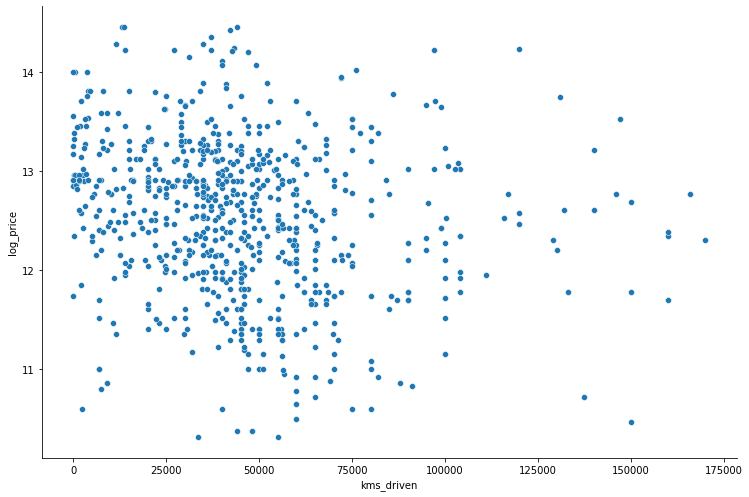

In [36]:
# Let's transform 'Price' with a log transformation
log_price = np.log(cl_df1['Price'])

# Then we add it to our data frame
cl_df1['log_price'] = log_price
sns.relplot(x='kms_driven',y='log_price',data=cl_df1,height=7,aspect=1.5)

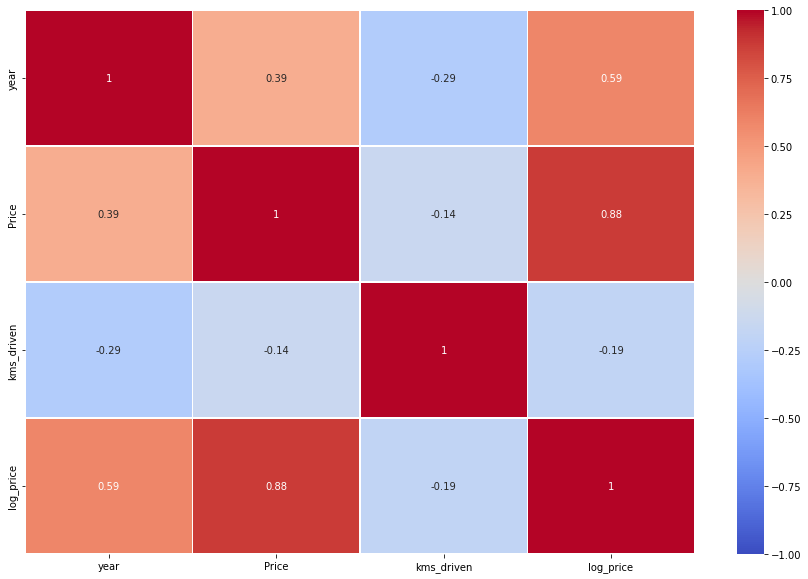

In [37]:
corr = cl_df1.corr()

fig = plt.figure(figsize=(15,10))

sns.heatmap(corr,annot=True,linewidths=.5,cmap='coolwarm',vmin=-1,vmax=1,center=0);

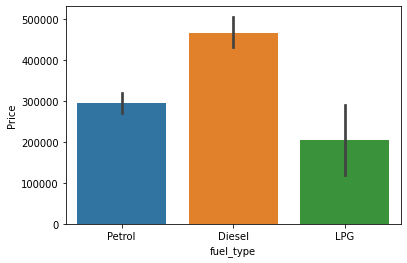

In [38]:
ax = sns.barplot(x="fuel_type", y="Price", data=cl_df1)


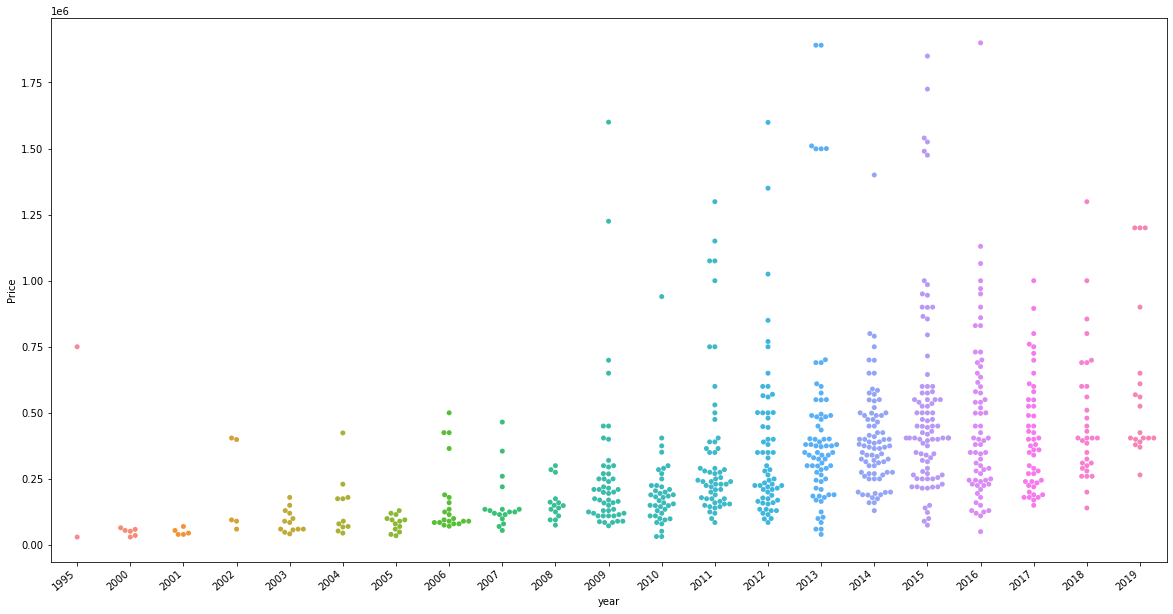

In [39]:
plt.subplots(figsize=(20,10))
ax=sns.swarmplot(x='year',y='Price',data=cl_df1)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

In [40]:
cl_df1.reset_index()

,index,name,company,year,Price,kms_driven,fuel_type,log_price
0,0,Hyundai Santro Xing,Hyundai,2007,80000.000000,45000,Petrol,11.289782
1,1,Mahindra Jeep CL550,Mahindra,2006,425000.000000,40,Diesel,12.959844
2,2,Maruti Suzuki Alto,Maruti,2018,404688.534422,22000,Petrol,12.910873
3,3,Hyundai Grand i10,Hyundai,2014,325000.000000,28000,Petrol,12.691580
4,4,Ford EcoSport Titanium,Ford,2014,575000.000000,36000,Diesel,13.262125
...,...,...,...,...,...,...,...,...
720,883,Maruti Suzuki Ritz,Maruti,2011,270000.000000,50000,Petrol,12.506177
721,885,Tata Indica V2,Tata,2009,110000.000000,30000,Diesel,11.608236
722,886,Toyota Corolla Altis,Toyota,2009,300000.000000,132000,Petrol,12.611538
723,888,Tata Zest XM,Tata,2018,260000.000000,27000,Diesel,12.468437


In [41]:
cl_df1.reset_index(drop=True)

,name,company,year,Price,kms_driven,fuel_type,log_price
0,Hyundai Santro Xing,Hyundai,2007,80000.000000,45000,Petrol,11.289782
1,Mahindra Jeep CL550,Mahindra,2006,425000.000000,40,Diesel,12.959844
2,Maruti Suzuki Alto,Maruti,2018,404688.534422,22000,Petrol,12.910873
3,Hyundai Grand i10,Hyundai,2014,325000.000000,28000,Petrol,12.691580
4,Ford EcoSport Titanium,Ford,2014,575000.000000,36000,Diesel,13.262125
...,...,...,...,...,...,...,...
720,Maruti Suzuki Ritz,Maruti,2011,270000.000000,50000,Petrol,12.506177
721,Tata Indica V2,Tata,2009,110000.000000,30000,Diesel,11.608236
722,Toyota Corolla Altis,Toyota,2009,300000.000000,132000,Petrol,12.611538
723,Tata Zest XM,Tata,2018,260000.000000,27000,Diesel,12.468437


In [106]:
cl_df1.drop(['log_price'],axis='columns',inplace=True)

## **Training our Model**

In [107]:
X=cl_df1.drop(columns='Price')
Y=cl_df1['Price']

In [109]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [110]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder

In [111]:
##OHE for dealing with catagories in ML
ohe=OneHotEncoder()
ohe.fit(X[['name','company','fuel_type']])

OneHotEncoder()

In [ ]:
ohe.categories_

In [113]:
##Transform OHE to column status
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name','company','fuel_type']),
                                    remainder='passthrough')

In [114]:
lm=LinearRegression()

In [115]:
#Pipeline to ease streamline workflow
pipe=make_pipeline(column_trans,lm)

In [116]:
pipe.fit(X_train,Y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0', 'Audi A8',
       'Audi Q3 2.0', 'Audi Q7', 'BMW 3 Series', 'BMW 5 Series',
       'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d', 'BMW X1 xDrive20d',
       'Chevrolet Beat', 'Chevrolet Beat Diesel', 'Chevrolet Beat LS',
       'Che...
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jeep', 'Mahindra', 'Maruti',
       'Mercedes', 'Mini', 'Mitsubishi', 'Nissan', 'Renault', 'Skoda',
       'Tata', 'Toyota', 'Volkswagen', 'Volvo'], dtype=object),
                                                                            array(['Diesel', 'LPG', 'Petrol'], dtype=obje

In [117]:
y_hat=pipe.predict(X_test)

In [118]:
r2_score(y_hat,Y_test)

0.5479349851318357

In [128]:
##As the R score is very low we will loop our model with different test sizes to find the model with the Max Rscore Value
scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.1,random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred)) 

In [120]:
np.max(scores)

0.9544287610582644

In [121]:
np.argmax(scores)

887

In [122]:
scores[np.argmax(scores)]

0.9544287610582644

In [123]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.05,random_state=np.argmax(scores))
lr=LinearRegression()
pipe=make_pipeline(column_trans,lr)
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
r2_score(y_test,y_pred)

0.9544287610582644

In [129]:
pipe.predict(pd.DataFrame(columns=['name','company','year','kms_driven','fuel_type'],data=np.array(['Maruti Suzuki Swift','Maruti',2019,100,'Petrol']).reshape(1,5)))

array([435324.0016006])

In [124]:
## Pickle the model for later use
import pickle
pickle.dump(pipe,open('LinearRegModel.pk1','wb'))

array([437266.28891075])